In [2]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

In [3]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

### 直方图

统计图像中相同像素点值的个数

![title](hist_1.png)

#### cv2.calcHist(images,channels,mask,histSize,ranges)

- images: 原图像图像格式为 uint8 或 ﬂoat32。当传入函数时应 用中括号 [] 括来例如[img]
- channels: 同样用中括号括来它会告函数我们统幅图 像的直方图。如果入图像是灰度图它的值就是 [0]如果是彩色图像 的传入的参数可以是 [0][1][2] 它们分别对应着 BGR。 
- mask: 掩模图像。统整幅图像的直方图就把它为 None。但是如 果你想统图像某一分的直方图的你就制作一个掩模图像并 使用它。
- histSize:BIN 的数目（直方图中的横坐标的数目）。也应用中括号括来
- ranges: 像素值范围常为 [0-256] 

In [4]:
img = cv2.imread('cat.jpg',0) #0表示灰度图
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(hist.shape)
print(type(hist))
print(hist.dtype)

(256, 1)
<class 'numpy.ndarray'>
float32


[153 157 162 ... 197 142 141]


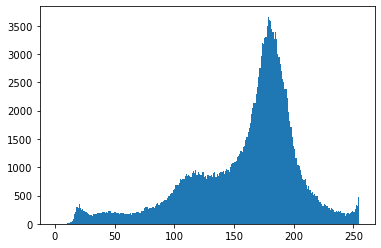

In [5]:
print(img.ravel())
plt.hist(img.ravel(),256); 
plt.show()

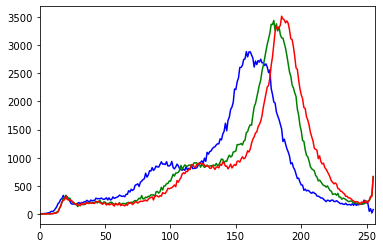

In [6]:
img = cv2.imread('cat.jpg') # 不用后置为0，因为默认读取彩色图
color = ('b','g','r')
for i,col in enumerate(color): 
    histr = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.plot(histr,color = col) 
    plt.xlim([0,256]) 


mask操作

In [ ]:
# 创建mast
mask = np.zeros(img.shape[:2], np.uint8)
print (mask.shape)
# 要保存的像素值，设为255即可
mask[100:300, 100:400] = 255
cv_show(mask,'mask')

(414, 500)


In [ ]:
img = cv2.imread('cat.jpg', 0)
cv_show(img,'img')

In [ ]:
masked_img = cv2.bitwise_and(img, img, mask=mask)#与操作
cv_show(masked_img,'masked_img')

In [ ]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

In [ ]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

#### 直方图均衡化

![title](hist_2.png)

![title](hist_3.png)

![title](hist_4.png)

In [ ]:
img = cv2.imread('clahe.jpg',0) #0表示灰度图 #clahe
plt.hist(img.ravel(),256); 
plt.show()

In [ ]:
# 进行均衡化
equ = cv2.equalizeHist(img) 
plt.hist(equ.ravel(),256)
plt.show()


In [ ]:
res = np.hstack((img,equ))
cv_show(res,'res')

#### 自适应直方图均衡化

In [ ]:
# 分块做均衡化
# 但是更可能会受到噪声点的影响
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) 

In [ ]:
res_clahe = clahe.apply(img)
res = np.hstack((img,equ,res_clahe))
cv_show(res,'res')

### 傅里叶变换

我们生活在时间的世界中，早上7:00起来吃早饭，8:00去挤地铁，9:00开始上班。。。以时间为参照就是时域分析。

但是在频域中一切都是静止的！

https://zhuanlan.zhihu.com/p/19763358

### 傅里叶变换的作用

- 高频：变化剧烈的灰度分量，例如边界

- 低频：变化缓慢的灰度分量，例如一片大海

### 滤波

- 低通滤波器：只保留低频，会使得图像模糊

- 高通滤波器：只保留高频，会使得图像细节增强










- opencv中主要就是cv2.dft()和cv2.idft()，输入图像需要先转换成np.float32 格式。
- 得到的结果中频率为0的部分会在左上角，通常要转换到中心位置，可以通过shift变换来实现。
- cv2.dft()返回的结果是双通道的（实部，虚部），通常还需要转换成图像格式才能展示（0,255）。

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg',0)

# 将图片转换为np.float32格式
img_float32 = np.float32(img)

# 执行傅里叶变换
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

# 将低频值转换到中心位置
dft_shift = np.fft.fftshift(dft)


# 得到灰度图能表示的形式(处理双通道，再映射到0-255)
# 越中间的像素点出现的频率越低
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

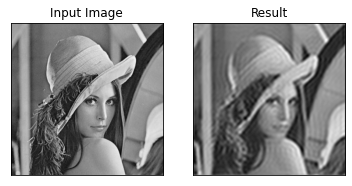

In [30]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 低通滤波：因为越中间越低频
# 所以mask设置为中间部分全部为1，区域部分全部为0
# 所以高通滤波相反即可
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# IDFT
fshift = dft_shift*mask
# 再把之前的转移到中间，放回原来的位置
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()                

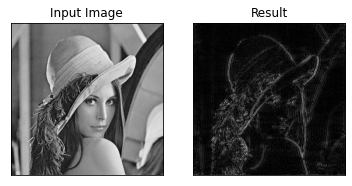

In [31]:
img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 高通滤波
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()    

因为先转换到频域中对图像做处理和直接对图像做处理更简单

所以傅里叶变换就是把数据转变到频域上的方法？